### Import des librairies et du fichier 

In [83]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import graphviz
import warnings
warnings.simplefilter("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

df = pd.read_csv('conversion_data.csv')

### Visualisation de la base de données

In [60]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [61]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


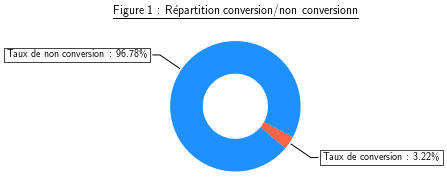

In [62]:
#Répartition conversion/non conversion
plt.rc('text', usetex=True)
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels =['Taux de conversion : 3.22\%','Taux de non conversion : 96.78\%']

match =[len(df[df['converted']==1])/len(df),len(df[df['converted']==0])/len(df)]

wedges, texts = ax.pie(match, wedgeprops=dict(width=0.5), colors=['tomato','dodgerblue'], startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title(r'\underline{Figure 1 : Répartition conversion/non conversionn}')
plt.show()
fig.savefig('file.png',transparent=False, dpi=80, bbox_inches="tight")

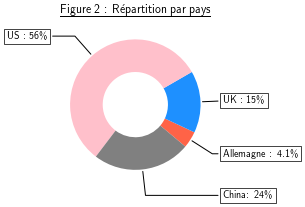

In [63]:
#Répartition par pays 
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

labels =['Allemagne : 4.1\%','UK : 15\%','US : 56\%','China: 24\%']

match =[len(df[df['country']=='Germany'])/len(df),len(df[df['country']=='UK'])/len(df),len(df[df['country']=='US'])/len(df),len(df[df['country']=='China'])/len(df)]

wedges, texts = ax.pie(match, wedgeprops=dict(width=0.5), colors=['tomato','dodgerblue','pink','grey'], startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title(r'\underline{Figure 2 : Répartition par pays}')
plt.show()
fig.savefig('file.png',transparent=False, dpi=80, bbox_inches="tight")

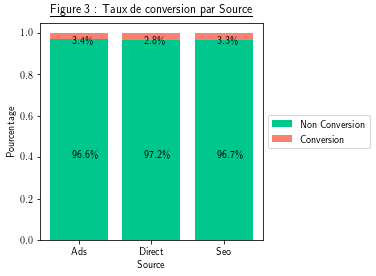

In [64]:
#Taux de conversion par source
source = df.groupby('source')['converted'].value_counts()
Idmatch1 =  source[3]/(source[3] + source[2])
Idmatch0 = source[1]/(source[1] + source[0])
Idmatch2 = source[5]/(source[5]+source[4])
Diffmatch1 = source[2]/(source[2] + source[3])
Diffmatch0 = source[0]/(source[0] + source[1])
Diffmatch2 = source[4]/(source[5]+source[4])
rapport1 = [Idmatch1,Idmatch0,Idmatch2]
rapport2 = [Diffmatch1,Diffmatch0,Diffmatch2]
legend = ["Ads",'Direct','Seo']
legend1 = [0,1,2]
legend2 = [0,1,2]

plt.figure(figsize=(4,4))
plt.bar(legend, rapport2, label="Femme",color=['#00C78C'])
plt.bar(legend, rapport1, bottom=rapport2,label="Homme",color=['salmon'])
plt.ylabel('Pourcentage')
plt.xlabel('Source')
plt.title(r"\underline{Figure 3 : Taux de conversion par Source}")
plt.legend(['Non Conversion','Conversion'], loc='center right', bbox_to_anchor=(1.5, 0.5))
label1 = ['3.4\%', '2.8\%','3.3\%']
label2 = ['96.6\%','97.2\%','96.7\%']
# Text on the top of each barplot
for i in range(len(legend)):
 plt.text(x = legend1[i]-0.1, y = 0.4, s = label2[i], size = 10)
 plt.text(x = legend1[i]-0.1, y = 0.95, s = label1[i], size = 10)

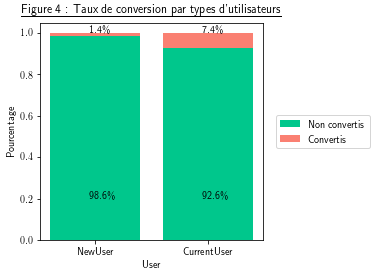

In [65]:
#Taux de conversion par type d'utilisateurs
df['new_user'] = df['new_user'].apply(lambda x :
                              "NewUser" if x==1
                              else "CurrentUser"
                             )

new_user = df.groupby('new_user')['converted'].value_counts()
Idmatch1 =  new_user[3]/(new_user[3] + new_user[2])
Idmatch0 = new_user[1]/(new_user[1] + new_user[0])
Diffmatch1 = new_user[2]/(new_user[2] + new_user[3])
Diffmatch0 = new_user[0]/(new_user[0] + new_user[1])
rapport1 = [Idmatch1,Idmatch0]
rapport2 = [Diffmatch1,Diffmatch0]
legend = ["NewUser",'CurrentUser']
legend1 = [0,1]
legend2 = [0,1]

plt.figure(figsize=(4,4))
plt.bar(legend, rapport2, label="Femme",color=['#00C78C'])
plt.bar(legend, rapport1, bottom=rapport2,label="Homme",color=['salmon'])
plt.ylabel('Pourcentage')
plt.xlabel('User')
plt.title(r"\underline{Figure 4 : Taux de conversion par types d'utilisateurs}")
plt.legend(['Non convertis','Convertis'], loc='center right', bbox_to_anchor=(1.5, 0.5))
label2 = [ '1.4\%','7.4\%']
label1 = ['98.6\%','92.6\%']
for i in range(len(legend)):
 plt.text(x = legend1[i]-0.05, y = 0.2, s = label1[i], size = 10)
 plt.text(x = legend1[i]-0.05, y = 1, s = label2[i], size = 10)

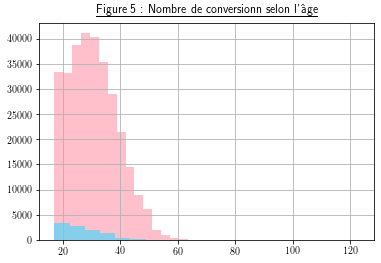

In [66]:
#Nombre de conversion selon l'âge
df1 = df[df['converted']==0]
df2 = df[df['converted']==1]
plt.hist(df1['age'], bins=20,facecolor='pink',alpha=1)
plt.hist(df2['age'], bins=20,facecolor='skyblue',alpha=1)
plt.title(r"\underline{Figure 5 : Nombre de conversionn selon l'âge}")
plt.grid(True)

### Valeurs manquantes

In [67]:
#Pas de valeurs manquantes 
df.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

### Valeurs aberrantes 

In [68]:
#Suppression observations age > 100 ans 
df.age.value_counts()
df = df[df.age<100]

### Preprocessing

In [69]:
#Définition X et y 
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

#Binarisation 
X = pd.get_dummies(X,drop_first=True)

In [71]:
#Split Train vs Test Set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify = y)

In [72]:
#Standardisation
sc_x = StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.transform(X_test)

### Machine Learning

#### Régression Logistique

In [73]:
#Entraintement du modèle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [75]:
#Résultats 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.057637
         Iterations 10
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.595     
Dependent Variable:   converted         AIC:               36465.2139
Date:                 2019-12-13 00:04  BIC:               36550.5269
No. Observations:     316198            Log-Likelihood:    -18225.   
Df Model:             7                 LL-Null:           -45053.   
Df Residuals:         316190            LLR p-value:       0.0000    
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       10.0000                                        
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
age                 -0.2493   0.0019 -128.2275 0.0000 -0.2531 -0.2455
total_pages_vis

In [85]:
#Résultats 
print('Accuracy of Logistic Regression on training set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regression on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of Logistic Regression on training set: 0.99
Accuracy of Logistic Regression on test set: 0.99
[[60889   311]
 [  688  1352]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     61200
           1       0.81      0.66      0.73      2040

    accuracy                           0.98     63240
   macro avg       0.90      0.83      0.86     63240
weighted avg       0.98      0.98      0.98     63240



#### Random Forest Classifier 

In [79]:
#Entraintement du modèle
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [80]:
#Résultats 
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(classifier.score(X_test, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

Accuracy of Random Forest classifier on training set: 0.99
Accuracy of Random Forest classifier on test set: 0.98
[[60889   311]
 [  688  1352]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     61200
           1       0.81      0.66      0.73      2040

    accuracy                           0.98     63240
   macro avg       0.90      0.83      0.86     63240
weighted avg       0.98      0.98      0.98     63240



#### Arbre de Décision

In [84]:
#Entraintement du modèle 
clf = DecisionTreeClassifier(criterion="gini",max_depth=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [86]:
#Résultats 
print('Accuracy of Decision Tree Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of Decision Tree Classifier on training set: 0.98
Accuracy of Decision Tree Classifier on test set: 0.98


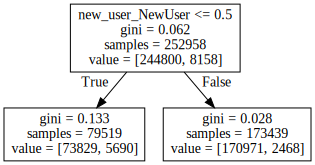

In [272]:
#Représentation graphique
dot_data = export_graphviz(clf, out_file=None, feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
graph